In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import math
import cmath
import pylab
import time

import scipy.io.wavfile as sw

In [12]:
def dft(x):
    N = len(x)
    X = np.zeros(N, dtype=complex)
    
    for m in range(N):
        for n in range(N):
            X[m] += cmath.exp(-1j * 2*math.pi / N *m *n) *x[n]
            
    return X/N


def idft(X):
    N = len(X)
    x = np.zeros(N, dtype=complex)
    
    for n in range(N):
        for m in range(N):
            x[n] += cmath.exp(1j * 2*math.pi / N *m *n) * X[m]
            
    return x


def fft(x):
    N = len(x)
    X = np.zeros(N, dtype=complex)
    if N == 1:
        X[0] = x[0]
        return X
    
    N2 = N//2
    xeven = x[0::2]
    xodd = x[1::2]
    Xeven = fft(xeven) *N2
    Xodd = fft(xodd) *N2
    
    for m in range(N):
        X[m] = Xeven[m%N2] + cmath.exp(-1j *2*math.pi/N*m) *Xodd[m%N2]
        
    return X / N

def ifft(X):
    N = len(X)
    Half_N = N // 2
    x = np.zeros(N, dtype = complex)
    if N == 1:
        x[0] = X[0]
    else:
        x_even = ifft(X[0::2])
        x_odd = ifft(X[1::2])
        for n in range(N):
            x[n] = x_even[n%Half_N] + x_odd[n%Half_N] * cmath.exp(1j*2*math.pi*n/N)
    return x
    

## after fourier transform, will be like

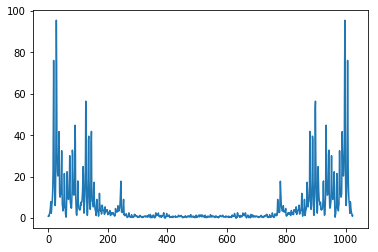

In [24]:
# violin22k.wav

fs, raw = sw.read('violin22k.wav')

v1k = raw[:1024]
v1k_fft = fft(v1k)
plt.plot(np.absolute(v1k_fft)[:])

## input data 'violin22k.wav'
## plot the original figure with audio signal versus time
## test the data through
    * DFT-->IDFT
    * DFT-->IFFT
    * FFT-->IDFT
    * FFT-->IFFT
## plot the figures after each trasforms and inverse transforms
## compare them to the original figure
## and the run times.
## N = 1024

In [1]:
# violin22k.wav

fs, raw = sw.read('violin22k.wav')

v1k = raw[:1024]
plt.plot(v1k)

r = dft(v1k)
start_time = time.time()
v1k_dft_idft = idft(r)    # DFT-->IDFT
elapsed_time = time.time() - start_time

plt.plot(v1k_dft_idft)

v1k_dft_ifft = ifft(r)    # DFT-->IFFT
plt.plot(v1k_dft_ifft)

r2 = fft(v1k)
v1k_fft_idft = idft(r2)    # FFT-->IDFT
plt.plot(v1k_fft_idft)

v1k_fft_ifft = ifft(r2)    # FFT-->IFFT
plt.plot(v1k_fft_ifft)

NameError: name 'sw' is not defined

## N = 4096

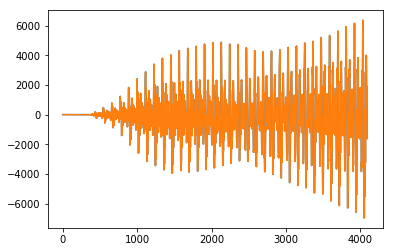

In [26]:
v4k = raw[:4096]
plt.plot(v4k)

r = dft(v4k)
v4k_dft_idft = idft(r)    # DFT-->IDFT
plt.plot(v4k_dft_idft)

v4k_dft_ifft = ifft(r)    # DFT-->IFFT
plt.plot(v4k_dft_ifft)

r2 = fft(v4k)
v4k_fft_idft = idft(r2)    # FFT-->IDFT
plt.plot(v4k_fft_idft)

v4k_fft_ifft = ifft(r2)    # FFT-->IFFT
plt.plot(v4k_fft_ifft)

KeyboardInterrupt: 

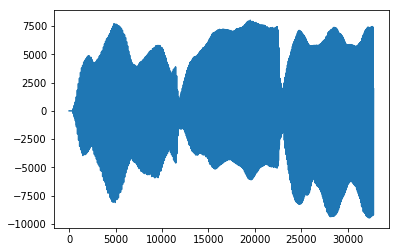

In [27]:
v1k = raw[:2**15]
plt.plot(v1k)

r = dft(v1k)
v1k_dft_idft = idft(r)    # DFT-->IDFT
plt.plot(v1k_dft_idft)

v1k_dft_ifft = ifft(r)    # DFT-->IFFT
plt.plot(v1k_dft_ifft)

r2 = fft(v1k)
v1k_fft_idft = idft(r2)    # FFT-->IDFT
plt.plot(v1k_fft_idft)

v1k_fft_ifft = ifft(r2)    # FFT-->IFFT
plt.plot(v1k_fft_ifft)

In [ ]:
# gtr-nylon22.wav

fs, raw = sw.read('gtr-nylon22.wav')

g1k = raw[:1024]
plt.plot(g1k)

r = dft(g1k)
g1k_dft_idft = idft(r)
plt.plot(g1k_dft_idft)

In [ ]:
g4k = raw[:4096]
plt.plot(g4k)

r = dft(g4k)
g4k_dft_idft = idft(r)
plt.plot(g4k_dft_idft)

In [ ]:
g32k = raw[:2**15]
plt.plot(g32k)

r = dft(g32k)
g32k_dft_idft = idft(r)
plt.plot(g32k_dft_idft)

In [ ]:
# pno-cs24k.wav
# DFT-->IDFT
fs, raw = sw.read('pno-cs24k.wav')

v1k = raw[:1024]
plt.plot(v1k)

r = dft(v1k)
v1k_dft_idft = idft(r)
plt.plot(v1k_dft_idft)